# Transfer Learning with TensorFlow: Fine-Tuning

In [1]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, walk_through_dir

## Get data

In [2]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent\test'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [3]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [4]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [5]:
train_data_10_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [6]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [7]:
for images, labels in train_data_10_percent.take(1):
    print(images, labels)

tf.Tensor(
[[[[2.26000000e+02 2.12000000e+02 2.25000000e+02]
   [2.25974487e+02 2.13974487e+02 2.25974487e+02]
   [2.28719391e+02 2.16719391e+02 2.28719391e+02]
   ...
   [2.50000000e+02 2.55000000e+02 2.46000000e+02]
   [2.50000000e+02 2.55000000e+02 2.46000000e+02]
   [2.50000000e+02 2.55000000e+02 2.46000000e+02]]

  [[2.25596939e+02 2.13596939e+02 2.25596939e+02]
   [2.28719391e+02 2.16719391e+02 2.28719391e+02]
   [2.31142853e+02 2.19142853e+02 2.31142853e+02]
   ...
   [2.50000000e+02 2.55000000e+02 2.46000000e+02]
   [2.50000000e+02 2.55000000e+02 2.46000000e+02]
   [2.50000000e+02 2.55000000e+02 2.46000000e+02]]

  [[2.29071426e+02 2.17071426e+02 2.29071426e+02]
   [2.32086746e+02 2.20086746e+02 2.32086746e+02]
   [2.32739807e+02 2.20831635e+02 2.32785721e+02]
   ...
   [2.50000000e+02 2.55000000e+02 2.46000000e+02]
   [2.50000000e+02 2.55000000e+02 2.46000000e+02]
   [2.50000000e+02 2.55000000e+02 2.46000000e+02]]

  ...

  [[2.24928574e+02 2.16928574e+02 2.14928574e+02]
   [2

## Model 0: Building a transfer learning model using the Keras Functional API

In [8]:
# 1. Create the base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
# 2. Freeze the model
base_model.trainable = False

# 3. Create inputs into the model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. If using a model like ResNet50V2 you will need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool of the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

history_0 = model_0.fit(
    train_data_10_percent,
    steps_per_epoch=len(train_data_10_percent),
    epochs=20,
    verbose=True,
    callbacks=[
        create_tensorboard_callback("05_tensorboard_logs", "10_percent_feature_extraction")
    ],
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data))
)


Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: 05_tensorboard_logs/10_percent_feature_extraction/20210814-151142


C:\ProgramData\Anaconda3\envs\general_env\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/20
24/24 [==============================] - 14s 226ms/step - loss: 1.8953 - accuracy: 0.4293 - val_loss: 1.3693 - val_accuracy: 0.7023
Epoch 2/20
24/24 [==============================] - 3s 116ms/step - loss: 1.1392 - accuracy: 0.7573 - val_loss: 0.9436 - val_accuracy: 0.7829
Epoch 3/20
24/24 [==============================] - 3s 121ms/step - loss: 0.8270 - accuracy: 0.8133 - val_loss: 0.7761 - val_accuracy: 0.8092
Epoch 4/20
24/24 [==============================] - 3s 116ms/step - loss: 0.6775 - accuracy: 0.8373 - val_loss: 0.6711 - val_accuracy: 0.8273
Epoch 5/20
24/24 [==============================] - 3s 121ms/step - loss: 0.5983 - accuracy: 0.8573 - val_loss: 0.6264 - val_accuracy: 0.8306
Epoch 6/20
24/24 [==============================] - 3s 120ms/step - loss: 0.5170 - accuracy: 0.8787 - val_loss: 0.5997 - val_accuracy: 0.8322
Epoch 7/20
24/24 [==============================] - 3s 117ms/step - loss: 0.4604 - accuracy: 0.9067 - val_loss: 0.5406 - val_accuracy: 0.8569
Epoch

In [9]:
model_0.evaluate(test_data)

79/79 [==============================] - 5s 67ms/step - loss: 0.4360 - accuracy: 0.8604


[0.4359589219093323, 0.8604000210762024]

In [10]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [11]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
_____________________________________________________________________________________

In [12]:
model_0.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


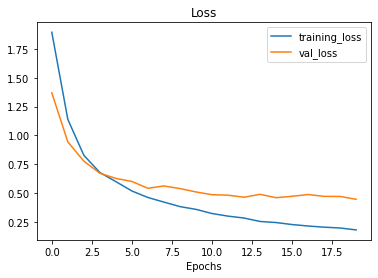

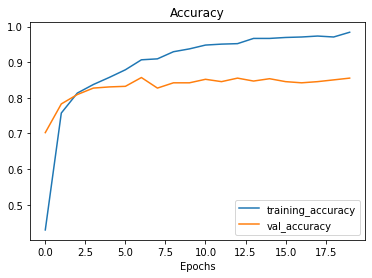

In [13]:
plot_loss_curves(history_0)

# Getting a feature vector from a trained model

Demonstrate the Global Average Pooling 2D layer

Similar shaped tensor (1,4,4,3) and pass it to GlobalAveragePooling2D

In [14]:
# Define the input shape
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(global_average_pooled_tensor.shape)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

(1, 3)
2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]



In [15]:
# Replicate the GlobalAveragePooling2D
tf.reduce_mean(input_tensor, axis=[1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [16]:
# Define the input shape
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# Pass the random tensor through a global max pooling 2D layer
global_max_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(global_max_pooled_tensor.shape)
print(f"2D global max pooled random tensor:\n {global_max_pooled_tensor}\n")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

(1, 3)
2D global max pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]



# Running a series of transfer learning experiments

1. `model_1` - use **feature extraction** *transfer learning* with **1%** of the training data with data augmentation
2. `model_2` - use **feature extraction** *transfer learning* with **10%** of the training with data augmentation
3. `model_3` - use **fine-tuning** *transfer learning* with **10%** of the training with data augmentation
4. `model_4` - use **fine-tuning** *transfer learning* with **100%** of the training with data augmentation

## Getting and preprocessing data for model_1

In [17]:
# Create training and test directories
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [18]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent\test'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\sushi'

In [19]:
# Setup data loaders
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_1_percent,
    label_mode="categorical",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode="categorical",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augmentation into the model

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = keras.Sequential(name="data_augmentation")
data_augmentation.add(preprocessing.RandomFlip("horizontal"))
data_augmentation.add(preprocessing.RandomZoom(0.2))
data_augmentation.add(preprocessing.RandomRotation(0.2))
data_augmentation.add(preprocessing.RandomHeight(0.2))
data_augmentation.add(preprocessing.RandomWidth(0.2))
# data_augmentation.add(preprocessing.Rescaling(1./255))


## Visualize data augmentation layer

2705497.jpg
(512, 512, 3)


Text(0.5, 1.0, 'Augmented random image from: pizza')

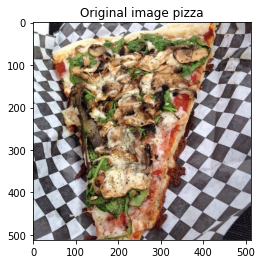

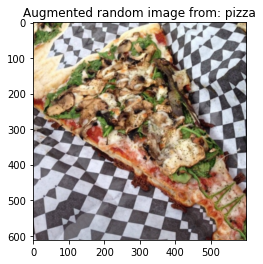

In [21]:
# View a random image and compare it to its augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
img = random.choice([x for x in os.listdir(target_dir)
               if os.path.isfile(os.path.join(target_dir, x))])
print(img)
img = mpimg.imread(target_dir +'/' +img)
plt.imshow(img, cmap=plt.cm.Blues)
plt.title(f"Original image {target_class}")
print(img.shape)
# Plot augmented image
augmented_image = data_augmentation(tf.expand_dims(img, axis=0))
augmented_image = augmented_image/255
plt.figure()
plt.imshow(tf.squeeze(augmented_image))
plt.title(f"Augmented random image from: {target_class}")


#  model_1: Feature extraction transfer learning on 1% of the data with data augmentation

In [22]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data_1_percent,
                    epochs=20,
                    steps_per_epoch=len(train_data_1_percent),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback("05_tensorboard_logs", "1_percent_data_aug")])

Saving TensorBoard log files to: 05_tensorboard_logs/1_percent_data_aug/20210814-151304
Epoch 1/20
3/3 [==============================] - 12s 2s/step - loss: 2.4258 - accuracy: 0.1286 - val_loss: 2.2290 - val_accuracy: 0.1760
Epoch 2/20
3/3 [==============================] - 2s 918ms/step - loss: 2.2066 - accuracy: 0.2143 - val_loss: 2.1087 - val_accuracy: 0.2549
Epoch 3/20
3/3 [==============================] - 3s 1s/step - loss: 1.9495 - accuracy: 0.4571 - val_loss: 2.0034 - val_accuracy: 0.3141
Epoch 4/20
3/3 [==============================] - 2s 924ms/step - loss: 1.7958 - accuracy: 0.5714 - val_loss: 1.9094 - val_accuracy: 0.3586
Epoch 5/20
3/3 [==============================] - 2s 964ms/step - loss: 1.6446 - accuracy: 0.6286 - val_loss: 1.8142 - val_accuracy: 0.4326
Epoch 6/20
3/3 [==============================] - 2s 909ms/step - loss: 1.5260 - accuracy: 0.7429 - val_loss: 1.7453 - val_accuracy: 0.4655
Epoch 7/20
3/3 [==============================] - 2s 830ms/step - loss: 1.338

In [23]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [24]:
model_1.evaluate(test_data)

79/79 [==============================] - 5s 58ms/step - loss: 1.1558 - accuracy: 0.6752


[1.1558430194854736, 0.6751999855041504]

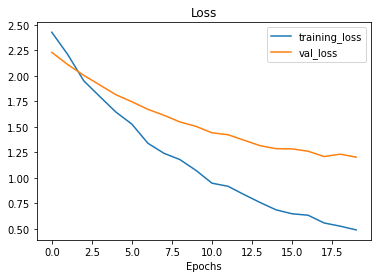

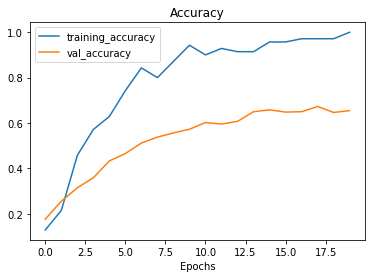

In [25]:
plot_loss_curves(history_1)

#  model_2: Feature extraction transfer learning on 10% of the data with data augmentation

In [26]:
# Create training and test directories
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [27]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent\test'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [28]:
# Setup data loaders
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_10_percent,
    label_mode="categorical",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode="categorical",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [29]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_2 = keras.Model(inputs, outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

## Creating a ModelCheckpoint callback

In [30]:
# Set checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    save_freq="epoch",
    verbose=1,
)


In [31]:
initial_epochs = 20
history_2 = model_2.fit(
    train_data_10_percent,
    epochs=initial_epochs,
    steps_per_epoch=len(train_data_10_percent),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),  # validate for less steps
    # Track model training logs
    callbacks=[
        create_tensorboard_callback("05_tensorboard_logs", "10_percent_data_aug"),
        checkpoint_callback,
    ],
)


Saving TensorBoard log files to: 05_tensorboard_logs/10_percent_data_aug/20210814-151408
Epoch 1/20
24/24 [==============================] - 18s 442ms/step - loss: 1.9960 - accuracy: 0.3213 - val_loss: 1.5085 - val_accuracy: 0.6464

Epoch 00001: val_loss improved from inf to 1.50847, saving model to ten_percent_model_checkpoints_weights\checkpoint.ckpt
Epoch 2/20
24/24 [==============================] - 8s 305ms/step - loss: 1.3671 - accuracy: 0.6787 - val_loss: 1.0793 - val_accuracy: 0.7467

Epoch 00002: val_loss improved from 1.50847 to 1.07932, saving model to ten_percent_model_checkpoints_weights\checkpoint.ckpt
Epoch 3/20
24/24 [==============================] - 7s 289ms/step - loss: 1.0520 - accuracy: 0.7427 - val_loss: 0.8841 - val_accuracy: 0.7697

Epoch 00003: val_loss improved from 1.07932 to 0.88415, saving model to ten_percent_model_checkpoints_weights\checkpoint.ckpt
Epoch 4/20
24/24 [==============================] - 7s 270ms/step - loss: 0.8948 - accuracy: 0.7773 - val_l

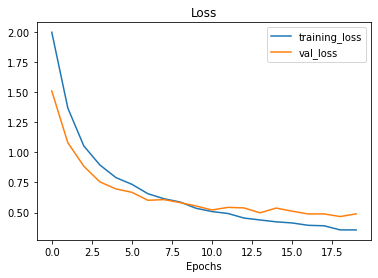

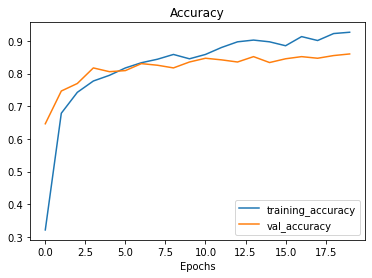

In [32]:
plot_loss_curves(history_2)

## Loading in checkpointed weights

In [33]:
# Load in saved_model weights and evaluate model
model_2.load_weights(checkpoint_path)

In [34]:
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 5s 57ms/step - loss: 0.5016 - accuracy: 0.8408


# Model 3: Fine-tuning an existing model on 10% of the data

In [35]:
# Layers in loaded model
model_2.layers

In [36]:
for layer in model_2.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x00000128F87D3FA0> True
<keras.engine.sequential.Sequential object at 0x00000128C953BD60> True
<keras.engine.functional.Functional object at 0x000001294888A1F0> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x00000128E36B1B80> True
<keras.layers.core.Dense object at 0x0000012948951490> True


In [37]:
for i, layer in enumerate(model_2.layers[2].layers):
    print(i, layer.name, layer.trainable)


0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [38]:
print(len(model_2.layers[2].trainable_variables))

0


In [39]:
# To begin fine-tuning, set the last 10 layer of the base_model to true
base_model.trainable = True

for layer in base_model.layers[:-10]:
    layer.trainable = False

# Recompile (must recompile the model every time a change is made)
model_2.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # when fine-tuning typically  want to lower the lr by 10x
    metrics=["accuracy"],
)


In [40]:
for layer_number, layer in enumerate(model_2.layers[2].layers):
    print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [41]:
print(len(model_2.trainable_variables))

12


In [42]:
model_2.trainable_variables

[<tf.Variable 'block7a_se_reduce/kernel:0' shape=(1, 1, 1152, 48) dtype=float32, numpy=
 array([[[[-0.05485657,  0.07178846,  0.01534605, ..., -0.09284662,
            0.0104828 , -0.02693838],
          [-0.03157939,  0.02819107, -0.05579546, ...,  0.00487578,
            0.12001809, -0.06901816],
          [-0.07792544,  0.12601745,  0.03935236, ...,  0.03086486,
           -0.01581392,  0.1306234 ],
          ...,
          [-0.07692936,  0.19920062,  0.17471024, ...,  0.03312391,
           -0.04528928, -0.09214652],
          [ 0.01010198,  0.06855008,  0.05820991, ...,  0.00131649,
           -0.08952942, -0.00476829],
          [ 0.03583075, -0.01228165,  0.04561347, ..., -0.00822134,
           -0.07354517, -0.06507882]]]], dtype=float32)>,
 <tf.Variable 'block7a_se_reduce/bias:0' shape=(48,) dtype=float32, numpy=
 array([-0.10886215, -0.13624744, -0.15257476,  0.14799541, -0.08512902,
        -0.12059905, -0.08779966, -0.08187538, -0.06925284, -0.12518929,
        -0.0819265 ,

In [43]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug = model_2.fit(
    train_data_10_percent,
    epochs=fine_tune_epochs,
    validation_data=test_data,
    initial_epoch=history_2.epoch[-1],  # start from previous last epoch
    validation_steps=int(0.25 * len(test_data)),
    callbacks=[
        create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")
    ],
)  # name experiment appropriately


Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20210814-151632
Epoch 20/25
24/24 [==============================] - 13s 275ms/step - loss: 0.3140 - accuracy: 0.9173 - val_loss: 0.4892 - val_accuracy: 0.8388
Epoch 21/25
24/24 [==============================] - 6s 245ms/step - loss: 0.2653 - accuracy: 0.9267 - val_loss: 0.4716 - val_accuracy: 0.8405
Epoch 22/25
24/24 [==============================] - 5s 207ms/step - loss: 0.2585 - accuracy: 0.9160 - val_loss: 0.4667 - val_accuracy: 0.8487
Epoch 23/25
24/24 [==============================] - 6s 243ms/step - loss: 0.2167 - accuracy: 0.9373 - val_loss: 0.4579 - val_accuracy: 0.8388
Epoch 24/25
24/24 [==============================] - 5s 220ms/step - loss: 0.1634 - accuracy: 0.9640 - val_loss: 0.4517 - val_accuracy: 0.8586
Epoch 25/25
24/24 [==============================] - 5s 223ms/step - loss: 0.1662 - accuracy: 0.9600 - val_loss: 0.4605 - val_accuracy: 0.8553


In [44]:
def compare_histories(original_history, new_history, initial_epochs=20):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

20
26
[0.3213333189487457, 0.6786666512489319, 0.7426666617393494, 0.7773333191871643, 0.7946666479110718, 0.8173333406448364, 0.8333333134651184, 0.843999981880188, 0.8586666584014893, 0.8453333377838135, 0.8586666584014893, 0.8799999952316284, 0.8973333239555359, 0.9026666879653931, 0.8973333239555359, 0.8853333592414856, 0.9133333563804626, 0.9013333320617676, 0.9226666688919067, 0.9266666769981384, 0.9173333048820496, 0.9266666769981384, 0.9160000085830688, 0.937333345413208, 0.9639999866485596, 0.9599999785423279]


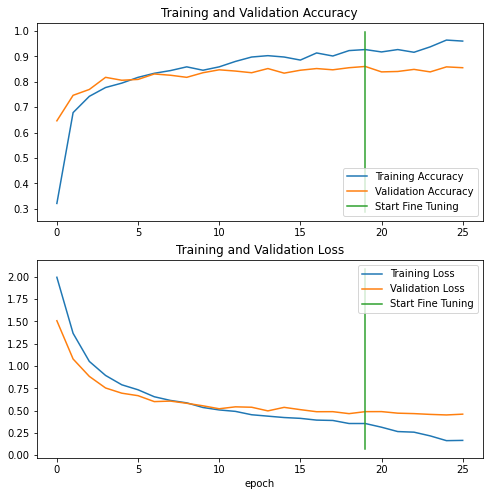

In [45]:
compare_histories(original_history=history_2, 
                 new_history=history_fine_10_percent_data_aug, 
                 initial_epochs=20)

# Model 4: Fine-tuning an existing model all of the data

In [46]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [47]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [48]:
# Setup data inputs
import tensorflow as tf

IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, label_mode="categorical", image_size=IMG_SIZE
)

# Note: this is the same test dataset we've been using for the previous modelling experiments
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir, label_mode="categorical", image_size=IMG_SIZE
)


Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [49]:
model_2.evaluate(test_data)

79/79 [==============================] - 5s 58ms/step - loss: 0.4933 - accuracy: 0.8376


[0.49331793189048767, 0.8375999927520752]

In [50]:
model_2.load_weights(checkpoint_path)

In [51]:
model_2.evaluate(test_data)

79/79 [==============================] - 5s 58ms/step - loss: 0.5016 - accuracy: 0.8408


[0.501630961894989, 0.8407999873161316]

In [52]:
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling_layer True
4 output_layer True


In [53]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [54]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001), # divide learning rate by 10 for fine-tuning
                metrics=["accuracy"])

C:\ProgramData\Anaconda3\envs\general_env\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [55]:
fine_tune_epochs = initial_epochs + 20

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           initial_epoch=history_2.epoch[-1],
                                           validation_data=test_data,
                                           validation_steps=len(test_data),
                                           callbacks=[create_tensorboard_callback("transfer_learning", "full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20210814-151726
Epoch 20/40
235/235 [==============================] - 37s 130ms/step - loss: 0.6538 - accuracy: 0.7932 - val_loss: 0.3681 - val_accuracy: 0.8716
Epoch 21/40
235/235 [==============================] - 39s 166ms/step - loss: 0.5421 - accuracy: 0.8259 - val_loss: 0.3409 - val_accuracy: 0.8872
Epoch 22/40
235/235 [==============================] - 36s 153ms/step - loss: 0.4874 - accuracy: 0.8411 - val_loss: 0.3193 - val_accuracy: 0.8932
Epoch 23/40
235/235 [==============================] - 34s 144ms/step - loss: 0.4423 - accuracy: 0.8545 - val_loss: 0.3067 - val_accuracy: 0.9004
Epoch 24/40
235/235 [==============================] - 31s 132ms/step - loss: 0.4082 - accuracy: 0.8667 - val_loss: 0.2963 - val_accuracy: 0.9008
Epoch 25/40
235/235 [==============================] - 33s 138ms/step - loss: 0.3785 - accuracy: 0.8808 - val_loss: 0.3003 - val_accuracy: 0.8992
Epoch 26/40
235/235 [==

In [ ]:
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

In [ ]:
compare_histories(original_history=history_2, new_history=history_fine_10_classes_full, initial_epochs=initial_epochs)

# Viewing experiments data on TensorBoard